# Metadata

- Title: Final Project Report
- Class: DS 5100
- Date: July.15.2022
- Student Name: Hyunsuk Ko
- Student Net ID: npm5ct
- This URL: 
- GitHub Repo URL:


# The Monte Carlo Module

In [2]:
import pandas as pd
import numpy as np
from montecarlo import Die, Game, Analyzer

In [3]:
# A code block with your classes.
sample_die = Die(['a','b','c'])
sample_die.change_weight('a', 2.0)
sample_die.roll_die()

sample_die_2 = Die(['a','b','c'])
sample_die_2.change_weight('c', 5.0)
sample_die_2.roll_die()

sample_die_3 = Die(['a','b','c'])
sample_die_3.change_weight('b', 15.0)
sample_die_3.roll_die()

array(['b'], dtype='<U1')

# Test Module

In [4]:
game = Game([sample_die, sample_die_2, sample_die_3])
game.play_game(5)

# Test Results

In [6]:
analyzer = Analyzer(game)
analyzer.jackpot()

0

In [7]:
analyzer.combo()

,Combination,Occurrence
0,"[a, c, b]",3.0
1,"[c, c, b]",1.0
2,"[a, c, c]",1.0


In [8]:
analyzer.face_count()

,a,b,c
roll_number,,,
0,0,1,2
1,1,1,1
2,1,1,1
3,1,0,2
4,1,1,1


# Scenarios
Code blocks with your scenarios and their outputs.
These should have appropriate import statements even though the code is now in the same notebook as the classes it calls.

### Scenario 1: A 2-headed coin

- Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
- Play a game of 1000 flips of 3 coins with all fair dice.
- Play a game of 1000 flips with 2 unfair dice and 1 fair die.
- For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
- Compute relative frequency as the number of jackpots over the total number of rolls.
- Show your results, comparing the two relative frequencies, in a simple bar chart.

In [9]:
fair_die = Die(['H','T']) # Fair coin
fair_die.roll_die()
fair_game = Game([fair_die, fair_die, fair_die])
game_num = 1000
fair_game.play_game(game_num)

analyzer = Analyzer(fair_game)
fair_freq = analyzer.jackpot() / game_num
fair_freq

0.229

In [10]:
fair_die_2 = Die(['H','T']) # Fair coin
fair_die_2.roll_die()

unfair_die_3 = Die(['H','T']) 
unfair_die_3.change_weight('H', 5.0)
unfair_die_3.roll_die()

unfair_die_4 = Die(['H','T']) 
unfair_die_4.change_weight('H', 5.0)
unfair_die_4.roll_die()

unfair_game = Game([fair_die_2, unfair_die_3, unfair_die_4])
game_num = 1000
unfair_game.play_game(game_num)

unfair_analyzer = Analyzer(unfair_game)
unfair_freq = unfair_analyzer.jackpot() / game_num
unfair_freq

0.353

([<matplotlib.axis.YTick at 0x7f74a3901730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

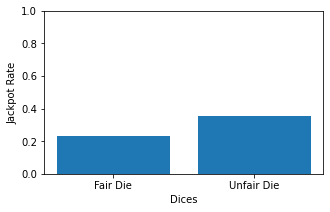

In [11]:
import matplotlib.pyplot as plt
import numpy as np

names = ['Fair Die', 'Unfair Die']
values = [fair_freq, unfair_freq]

plt.figure(figsize=(5,3))

plt.bar(names, values)
plt.ylabel("Jackpot Rate")
plt.xlabel("Dices")
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

### Scenario 2: A 6-sided die

- Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.
- Play a game of 10000 rolls with 5 fair dice.
- Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
- For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
- Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

### Case 1: 5 Fair Dice

In [12]:
fair = Die(['1','2','3','4','5','6'])
unfair_1 = Die(['1','2','3','4','5','6'])
unfair_2 = Die(['1','2','3','4','5','6'])
unfair_1.change_weight('6', 5.0)
unfair_2.change_weight('1', 5.0)

True

In [13]:
fair.roll_die()
game_1 = Game([fair, fair, fair, fair, fair])
game_num = 10000
game_1.play_game(game_num)

analyzer_1 = Analyzer(game_1)
freq_1 = analyzer_1.jackpot() / game_num
freq_1

0.0007

In [14]:
a = analyzer_1.combo()
top_combos = a.sort_values('Occurrence', ascending = False)[:10]
top_combos

,Combination,Occurrence
0,"[3, 3, 3, 5, 2]",7.0
1,"[2, 6, 1, 2, 3]",7.0
7,"[3, 3, 5, 1, 2]",6.0
12,"[4, 1, 6, 1, 1]",6.0
11,"[1, 1, 4, 5, 3]",6.0
9,"[2, 6, 3, 5, 3]",6.0
8,"[4, 4, 3, 4, 4]",6.0
10,"[2, 2, 4, 2, 1]",6.0
6,"[2, 1, 3, 6, 3]",6.0
5,"[5, 2, 6, 3, 5]",6.0


Text(0, 0.5, 'Occurrence')

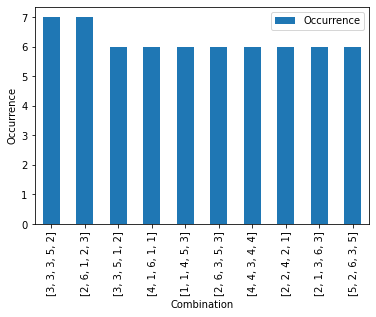

In [15]:
top_combos.plot.bar(x ='Combination', y = 'Occurrence')
plt.ylabel('Occurrence')

### Case 2: 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice

In [16]:
fair.roll_die()
unfair_1.roll_die()
unfair_2.roll_die()
game_2 = Game([fair, fair, unfair_1, unfair_1, unfair_2])
game_num = 10000
game_2.play_game(game_num)
analyzer_2 = Analyzer(game_2)
freq_2 = analyzer_2.jackpot() / game_num
freq_2

0.0004

In [17]:
b = analyzer_2.combo()
top_combos = b.sort_values('Occurrence', ascending = False)[:10]
top_combos

,Combination,Occurrence
0,"[5, 3, 6, 6, 1]",50.0
1,"[3, 1, 6, 6, 1]",47.0
2,"[1, 5, 6, 6, 1]",45.0
3,"[6, 4, 6, 6, 1]",42.0
4,"[6, 5, 6, 6, 1]",41.0
5,"[1, 1, 6, 6, 1]",41.0
6,"[2, 2, 6, 6, 1]",40.0
7,"[6, 2, 6, 6, 1]",39.0
8,"[6, 3, 6, 6, 1]",39.0
9,"[2, 6, 6, 6, 1]",39.0


Text(0, 0.5, 'Occurrence')

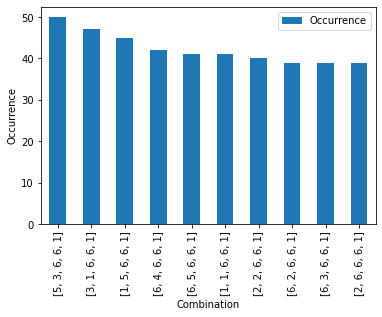

In [18]:
top_combos.plot.bar(x ='Combination', y = 'Occurrence')
plt.ylabel('Occurrence')

### Total Jacpot Rate Results for Both Cases

([<matplotlib.axis.YTick at 0x7f749ff3b4c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

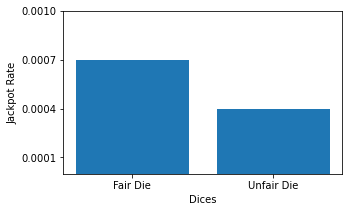

In [19]:
import matplotlib.pyplot as plt
import numpy as np

names = ['Fair Die', 'Unfair Die']
values = [freq_1, freq_2]

plt.figure(figsize=(5,3))

plt.bar(names, values)
plt.ylabel("Jackpot Rate")
plt.xlabel("Dices")
plt.yticks([0.0001, 0.0004, 0.0007, 0.001])

### Scendario 3: Letters of the Roman Alphabet 

- Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
- Play a game involving 5 of these dice with 1000 rolls.
- How many combos can you that look like actual English words?
- NOTE: "combo" here should really be permutation, which make sense for words. So just compute these from the result data you get from the Game object.
- Based on your eye count, what is the relative frequency of these words versus the rest?
- NOTE: You can do a few random sample to compute your estimate.
- The weights for the letters are in the Appendix to this document.

In [21]:
freqs = pd.read_csv('letter-freqs.csv', sep = '\t')
a_row = []
for ele in list(freqs.columns):
    if len(ele) > 2:
        ele = float(ele)
    a_row.append(ele)
freqs.loc[len(freqs)] = a_row
freqs.columns = ['letter', 'ratio']
freqs = freqs.sort_values(by=['letter'])
freqs.index = np.arange(len(freqs))
freqs = freqs.set_index('letter')
freq_dict = list(freqs.to_dict().values())[0]
freq_dict

{'A': 8.4966,
 'B': 2.072,
 'C': 4.5388,
 'D': 3.3844,
 'E': 11.1607,
 'F': 1.8121,
 'G': 2.4705,
 'H': 3.0034,
 'I': 7.5448,
 'J': 0.1965,
 'K': 1.1016,
 'L': 5.4893,
 'M': 3.0129,
 'N': 6.6544,
 'O': 7.1635,
 'P': 3.1671,
 'Q': 0.1962,
 'R': 7.5809,
 'S': 5.7351,
 'T': 6.9509,
 'U': 3.6308,
 'V': 1.0074,
 'W': 1.2899,
 'X': 0.2902,
 'Y': 1.7779,
 'Z': 0.2722}

In [22]:
from string import ascii_lowercase
alphabets = [c.upper() for c in ascii_lowercase]

In [23]:
alphabet_die = Die(alphabets)
for key in freq_dict:
    alphabet_die.change_weight(key, freq_dict[key])
alphabet_die.df[:5]

,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607


In [24]:
alphabet_die.roll_die()
fair_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
game_num = 1000
fair_game.play_game(game_num)

analyzer = Analyzer(fair_game)

In [25]:
analyzer.jackpot()

0

In [26]:
alpha_combo = analyzer.combo()
alpha_combo

,Combination,Occurrence
0,"[B, E, I, A, T]",1.0
1,"[N, A, U, B, T]",1.0
2,"[N, N, E, P, B]",1.0
3,"[U, L, T, L, A]",1.0
4,"[M, N, V, O, E]",1.0
...,...,...
995,"[H, R, U, C, A]",1.0
996,"[V, H, O, K, N]",1.0
997,"[L, D, G, S, P]",1.0
998,"[C, C, I, D, T]",1.0


In [27]:
eyeballs = alpha_combo['Combination'][:30]
eyeballs

0     [B, E, I, A, T]
1     [N, A, U, B, T]
2     [N, N, E, P, B]
3     [U, L, T, L, A]
4     [M, N, V, O, E]
5     [L, R, C, S, B]
6     [N, N, M, O, K]
7     [K, O, R, K, K]
8     [B, K, N, E, H]
9     [N, A, T, S, S]
10    [C, Y, S, H, O]
11    [N, T, U, A, I]
12    [I, E, U, G, L]
13    [L, O, Y, U, N]
14    [L, K, A, T, B]
15    [R, I, I, N, O]
16    [O, H, N, A, R]
17    [I, O, S, D, S]
18    [F, C, J, E, E]
19    [A, I, P, E, R]
20    [S, T, I, O, T]
21    [L, E, N, E, A]
22    [N, E, R, I, N]
23    [C, E, R, E, R]
24    [U, S, B, R, L]
25    [R, R, M, A, E]
26    [F, N, L, B, E]
27    [F, E, T, N, L]
28    [E, A, N, P, I]
29    [O, S, N, V, R]
Name: Combination, dtype: object

### Result
: Apparantely, none of the combinations from my 30 samples look like actual words.

# Directory Listing
A code block that executes the following bash command:

!ls -lRF -o


In [1]:
!ls -lRF -o

.:
total 108
-rw-r--r-- 1 npm5ct 67845 Jul 14 17:49 final-project-submission.ipynb
-rw-r--r-- 1 npm5ct 11357 Jul 14 10:43 LICENSE
-rw-r--r-- 1 npm5ct  3499 Jul 14 17:16 README.md
-rw-r--r-- 1 npm5ct   281 Jul 14 11:09 setup.py
drwxr-sr-x 5 npm5ct  3584 Jul 14 17:49 simulator/
drwxr-sr-x 2 npm5ct  2048 Jul 14 11:09 simulator.egg-info/

./simulator:
total 96
-rw-r--r-- 1 npm5ct     0 Jul 14 10:44 __init__.py
-rw-r--r-- 1 npm5ct   234 Jul 14 17:44 letter-freqs.csv
-rw-r--r-- 1 npm5ct 60271 Jul 14 10:46 montecarlo_demo.ipynb
-rw-r--r-- 1 npm5ct 11365 Jul 14 12:55 montecarlo.py
drwxr-sr-x 2 npm5ct   512 Jul 14 17:34 __pycache__/
drwxr-sr-x 3 npm5ct  2048 Jul 14 11:05 test/

./simulator/__pycache__:
total 12
-rw-r--r-- 1 npm5ct 8178 Jul 14 17:34 montecarlo.cpython-38.pyc

./simulator/test:
total 20
-rw-r--r-- 1 npm5ct    0 Jul 14 11:04 __init__.py
-rw-r--r-- 1 npm5ct  831 Jul 14 11:03 montecarlo_results.txt
-rw-r--r-- 1 npm5ct 4126 Jul 14 10:46 montecarlo_tests.py

./simulator.egg-info:
tota

# Installation Output Listing
A code block that executes the code to install your your package and outputs a successful installation.

In [2]:
!pip install -e.

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/npm5ct/documents/MSDS/DS5100/MonteCarloSimulator
  Attempting uninstall: simulator
    Found existing installation: simulator 0.1
    Uninstalling simulator-0.1:
      Successfully uninstalled simulator-0.1
  Running setup.py develop for simulator
